In [1]:
import matplotlib.pyplot as plt
import numpy as np
import struct
import os 

9


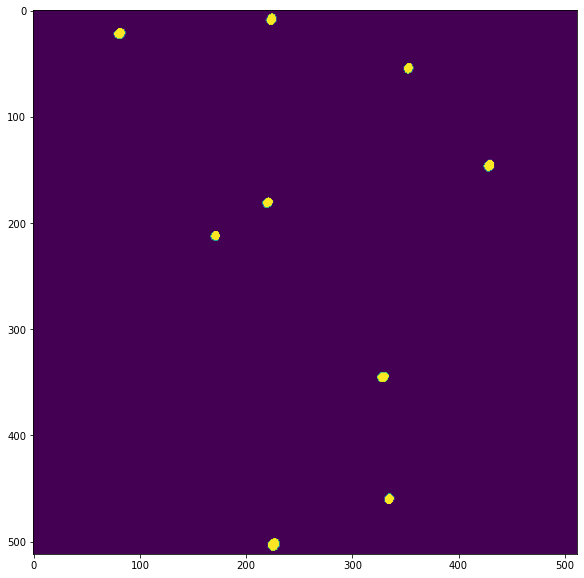

In [2]:
litx=4              
lity=6
litz=1
litxx=format(litx*0.2,".1f")            
litzz=format(litz*0.05,".2f")
filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
filename=str(filename)

logic=os.path.isfile(filename)

if logic:

    im=np.load(filename)
    h,w = im.shape
    k=len(np.zeros(int(np.max(im)+1),dtype=int))
    if k>0:
        vtab=np.zeros(int(np.max(im)+1),dtype=int)
        xtab=np.zeros(int(np.max(im)+1),dtype=float)
        ytab=np.zeros(int(np.max(im)+1),dtype=float)
        r2tab=np.ones(int(np.max(im)+1),dtype=float)

    for y in range(h):
        for x in range(w):
            t=int(im[y,x])
            if t>=0:
                vtab[t]+=1
                xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                if r2>r2tab[t]:
                    r2tab[t]=r2


    kolo=vtab/r2tab>2.4
    kolmap=np.zeros(np.shape(im))
    for x in range(h):
        for y in range(w):
            t=int(im[x,y])
            if t>=0:
                kolmap[x,y]=kolo[t]

    plt.figure(figsize=(10,10))
    plt.imshow(kolmap)
    print(np.sum(kolo))

In [ ]:
#Powyzej sprdzilem ze program prawidlowo importuje plik, prawdza czy obszary sa skyrmionami i prawidlowo okresla ich ilosc#

190


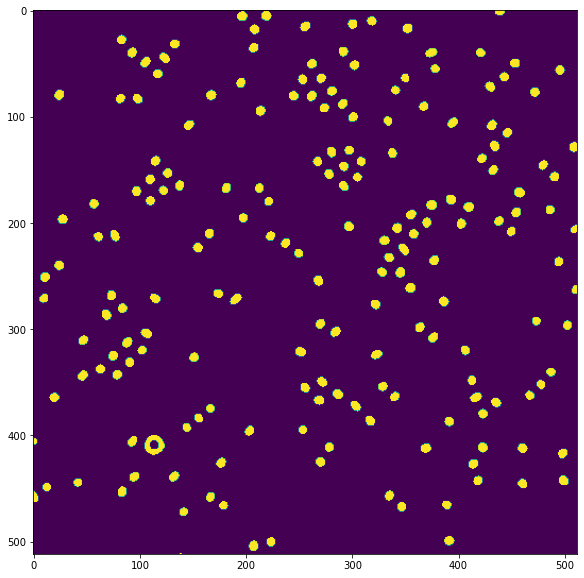

In [3]:
litx=4              
lity=6
litz=10
litxx=format(litx*0.2,".1f")            
litzz=format(litz*0.05,".2f")
filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
filename=str(filename)

logic=os.path.isfile(filename)

if logic:

    im=np.load(filename)
    h,w = im.shape
    k=len(np.zeros(int(np.max(im)+1),dtype=int))
    if k>0:
        vtab=np.zeros(int(np.max(im)+1),dtype=int)
        xtab=np.zeros(int(np.max(im)+1),dtype=float)
        ytab=np.zeros(int(np.max(im)+1),dtype=float)
        r2tab=np.ones(int(np.max(im)+1),dtype=float)

    for y in range(h):
        for x in range(w):
            t=int(im[y,x])
            if t>=0:
                vtab[t]+=1
                xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                if r2>r2tab[t]:
                    r2tab[t]=r2


    kolo=vtab/r2tab>1.5   # <-------------------------------
    kolmap=np.zeros(np.shape(im))
    for x in range(h):
        for y in range(w):
            t=int(im[x,y])
            if t>=0:
                kolmap[x,y]=kolo[t]

    plt.figure(figsize=(10,10))
    plt.imshow(kolmap)
    print(np.sum(kolo))

In [ ]:
#Kwestia ktora mnie zastanawia to dobor odpowiedniego wspolczynnikia "okraglosci"? (zaznaczone strzalka wyzej), jesli ustanowimy je zbyt wysoko#
#mozemy utracic istotne obszary ktore rowniez wydaja sie byc skyrmionami, jesli ustawimy je zbyt nisko zaczynaja pojawiac sie obszary owalne #
#gdzie jest niesubiektywna granica miedzy skyrmionem a mala domena owalna?# #okazjonalnie pojawia sie rowniez problem okregow, ktore przez #
#zastosowane kryteria odczytywane sa jako skyrmiony (przyklad powyzej)#

In [ ]:
#Ponizej stworzylem propozycje wykresow zgodnych z wytycznymi z ostatniego spotkania#
#Analize przeprowadzilem dla kilku wybranych zestawow Q i D #

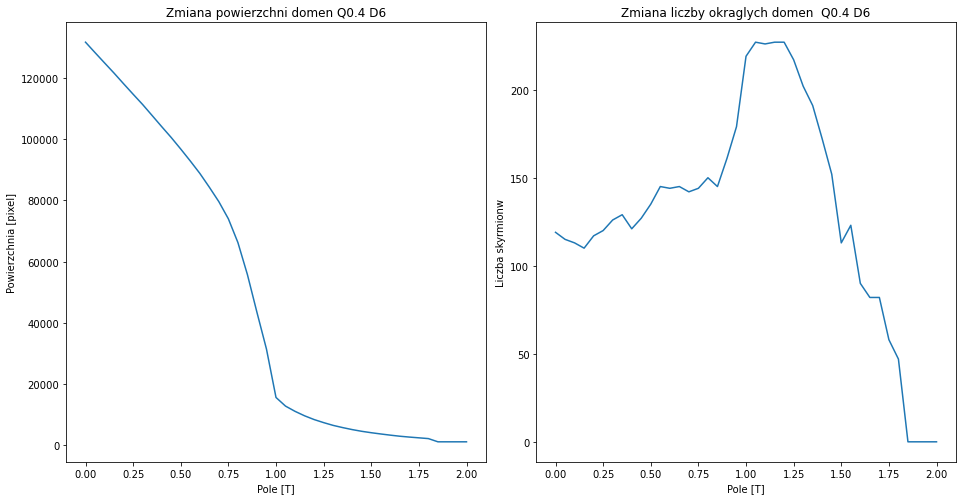

In [4]:
litx=2              
lity=6
tabT=np.zeros(41*4).reshape(4,41)
for litz in range(41):
    litxx=format(litx*0.2,".1f")            
    litzz=format(litz*0.05,".2f")
    filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
    filename=str(filename)

    logic=os.path.isfile(filename)

    if logic:

        im=np.load(filename)
        h,w = im.shape
        k=len(np.zeros(int(np.max(im)+1),dtype=int))
        if k>0:
            vtab=np.zeros(int(np.max(im)+1),dtype=int)
            xtab=np.zeros(int(np.max(im)+1),dtype=float)
            ytab=np.zeros(int(np.max(im)+1),dtype=float)
            r2tab=np.ones(int(np.max(im)+1),dtype=float)

        for y in range(h):
            for x in range(w):
                t=int(im[y,x])
                if t>=0:
                    vtab[t]+=1
                    xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                    ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                    r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                    if r2>r2tab[t]:
                        r2tab[t]=r2

        if len(vtab)>0:  
            minw=np.min(vtab)
            maxw=np.max(vtab)
            swaz=np.average(vtab)
        else:
            minw=0
            maxw=0
            swaz=0

        kolo=vtab/r2tab>2
        kolmap=np.zeros(np.shape(im))
        for x in range(h):
            for y in range(w):
                t=int(im[x,y])
                if t>=0:
                    kolmap[y,x]=kolo[t]
        
        tabT[0,litz]=litzz
        tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100
        tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1)) 
        tabT[3,litz]=np.sum(kolo)


        
plt.figure(figsize=(20,20))
plot1 = plt.subplot2grid((3,3), (0, 0)) 
plot2 = plt.subplot2grid((3,3), (0, 1)) 
plot2.plot(tabT[0,:],tabT[3,:])  
plot2.set_title(f"Zmiana liczby okraglych domen  Q{litxx} D{lity}")
plot2.set_xlabel('Pole [T]')
plot2.set_ylabel('Liczba skyrmionw') 
plot1.plot(tabT[0,:],tabT[2,:])  
plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
plot1.set_xlabel('Pole [T]')
plot1.set_ylabel('Powierzchnia [pixel]')
plt.tight_layout() 

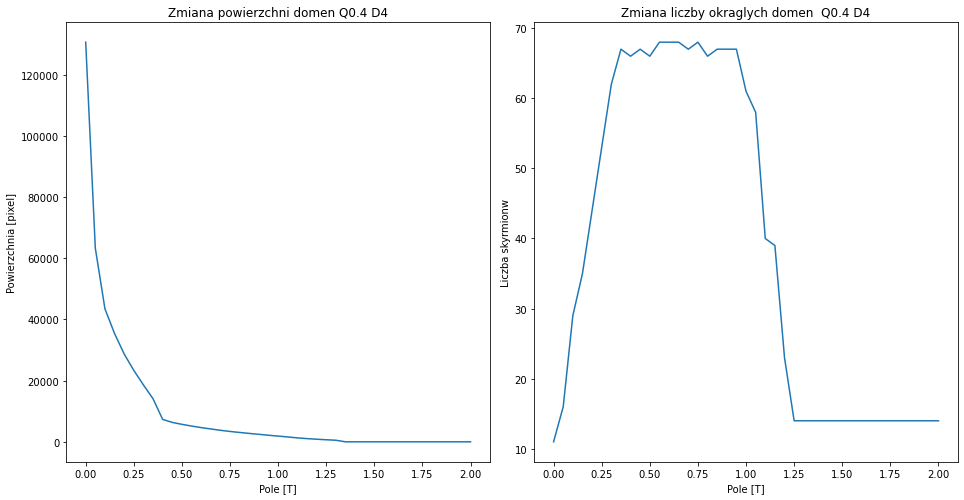

In [5]:
litx=2              
lity=4
tabT=np.zeros(41*4).reshape(4,41)
for litz in range(41):
    litxx=format(litx*0.2,".1f")            
    litzz=format(litz*0.05,".2f")
    filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
    filename=str(filename)

    logic=os.path.isfile(filename)

    if logic:

        im=np.load(filename)
        h,w = im.shape
        k=len(np.zeros(int(np.max(im)+1),dtype=int))
        if k>0:
            vtab=np.zeros(int(np.max(im)+1),dtype=int)
            xtab=np.zeros(int(np.max(im)+1),dtype=float)
            ytab=np.zeros(int(np.max(im)+1),dtype=float)
            r2tab=np.ones(int(np.max(im)+1),dtype=float)

        for y in range(h):
            for x in range(w):
                t=int(im[y,x])
                if t>=0:
                    vtab[t]+=1
                    xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                    ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                    r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                    if r2>r2tab[t]:
                        r2tab[t]=r2

        if len(vtab)>0:  
            minw=np.min(vtab)
            maxw=np.max(vtab)
            swaz=np.average(vtab)
        else:
            minw=0
            maxw=0
            swaz=0

        kolo=vtab/r2tab>2
        kolmap=np.zeros(np.shape(im))
        for x in range(h):
            for y in range(w):
                t=int(im[x,y])
                if t>=0:
                    kolmap[y,x]=kolo[t]
        
        tabT[0,litz]=litzz
        tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100
        tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1)) 
        tabT[3,litz]=np.sum(kolo)


        
plt.figure(figsize=(20,20))
plot1 = plt.subplot2grid((3,3), (0, 0)) 
plot2 = plt.subplot2grid((3,3), (0, 1)) 
plot2.plot(tabT[0,:],tabT[3,:])  
plot2.set_title(f"Zmiana liczby okraglych domen  Q{litxx} D{lity}")
plot2.set_xlabel('Pole [T]')
plot2.set_ylabel('Liczba skyrmionw') 
plot1.plot(tabT[0,:],tabT[2,:])  
plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
plot1.set_xlabel('Pole [T]')
plot1.set_ylabel('Powierzchnia [pixel]')
plt.tight_layout() 

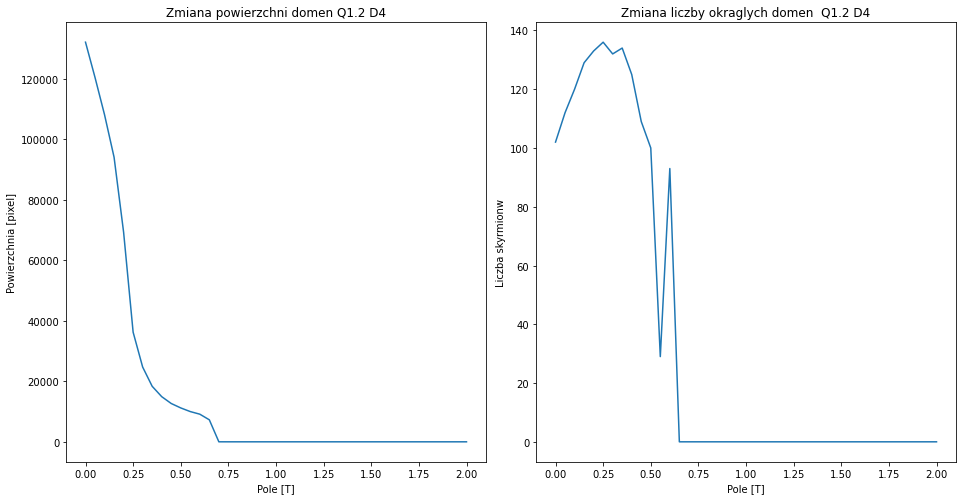

In [7]:
litx=6              
lity=4
tabT=np.zeros(41*4).reshape(4,41)
for litz in range(41):
    litxx=format(litx*0.2,".1f")            
    litzz=format(litz*0.05,".2f")
    filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
    filename=str(filename)

    logic=os.path.isfile(filename)

    if logic:

        im=np.load(filename)
        h,w = im.shape
        k=len(np.zeros(int(np.max(im)+1),dtype=int))
        if k>0:
            vtab=np.zeros(int(np.max(im)+1),dtype=int)
            xtab=np.zeros(int(np.max(im)+1),dtype=float)
            ytab=np.zeros(int(np.max(im)+1),dtype=float)
            r2tab=np.ones(int(np.max(im)+1),dtype=float)

        for y in range(h):
            for x in range(w):
                t=int(im[y,x])
                if t>=0:
                    vtab[t]+=1
                    xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                    ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                    r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                    if r2>r2tab[t]:
                        r2tab[t]=r2

        if len(vtab)>0:  
            minw=np.min(vtab)
            maxw=np.max(vtab)
            swaz=np.average(vtab)
        else:
            minw=0
            maxw=0
            swaz=0

        kolo=vtab/r2tab>2
        kolmap=np.zeros(np.shape(im))
        for x in range(h):
            for y in range(w):
                t=int(im[x,y])
                if t>=0:
                    kolmap[y,x]=kolo[t]
        
        tabT[0,litz]=litzz
        tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100
        tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1)) 
        tabT[3,litz]=np.sum(kolo)


        
plt.figure(figsize=(20,20))
plot1 = plt.subplot2grid((3,3), (0, 0)) 
plot2 = plt.subplot2grid((3,3), (0, 1)) 
plot2.plot(tabT[0,:],tabT[3,:])  
plot2.set_title(f"Zmiana liczby okraglych domen  Q{litxx} D{lity}")
plot2.set_xlabel('Pole [T]')
plot2.set_ylabel('Liczba skyrmionw') 
plot1.plot(tabT[0,:],tabT[2,:])  
plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
plot1.set_xlabel('Pole [T]')
plot1.set_ylabel('Powierzchnia [pixel]')
plt.tight_layout() 

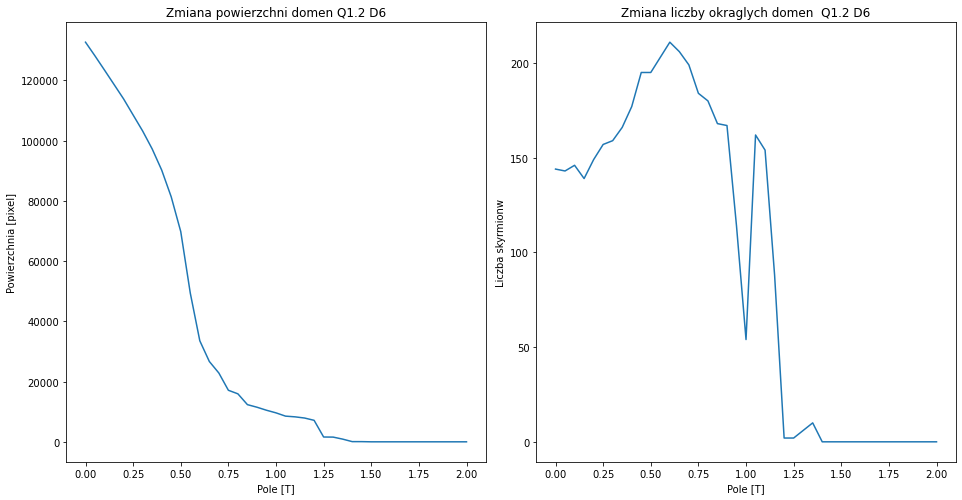

In [8]:
litx=6              
lity=6
tabT=np.zeros(41*4).reshape(4,41)
for litz in range(41):
    litxx=format(litx*0.2,".1f")            
    litzz=format(litz*0.05,".2f")
    filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
    filename=str(filename)

    logic=os.path.isfile(filename)

    if logic:

        im=np.load(filename)
        h,w = im.shape
        k=len(np.zeros(int(np.max(im)+1),dtype=int))
        if k>0:
            vtab=np.zeros(int(np.max(im)+1),dtype=int)
            xtab=np.zeros(int(np.max(im)+1),dtype=float)
            ytab=np.zeros(int(np.max(im)+1),dtype=float)
            r2tab=np.ones(int(np.max(im)+1),dtype=float)

        for y in range(h):
            for x in range(w):
                t=int(im[y,x])
                if t>=0:
                    vtab[t]+=1
                    xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                    ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                    r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                    if r2>r2tab[t]:
                        r2tab[t]=r2

        if len(vtab)>0:  
            minw=np.min(vtab)
            maxw=np.max(vtab)
            swaz=np.average(vtab)
        else:
            minw=0
            maxw=0
            swaz=0

        kolo=vtab/r2tab>2
        kolmap=np.zeros(np.shape(im))
        for x in range(h):
            for y in range(w):
                t=int(im[x,y])
                if t>=0:
                    kolmap[y,x]=kolo[t]
        
        tabT[0,litz]=litzz
        tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100
        tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1)) 
        tabT[3,litz]=np.sum(kolo)


        
plt.figure(figsize=(20,20))
plot1 = plt.subplot2grid((3,3), (0, 0)) 
plot2 = plt.subplot2grid((3,3), (0, 1)) 
plot2.plot(tabT[0,:],tabT[3,:])  
plot2.set_title(f"Zmiana liczby okraglych domen  Q{litxx} D{lity}")
plot2.set_xlabel('Pole [T]')
plot2.set_ylabel('Liczba skyrmionw') 
plot1.plot(tabT[0,:],tabT[2,:])  
plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
plot1.set_xlabel('Pole [T]')
plot1.set_ylabel('Powierzchnia [pixel]')
plt.tight_layout() 

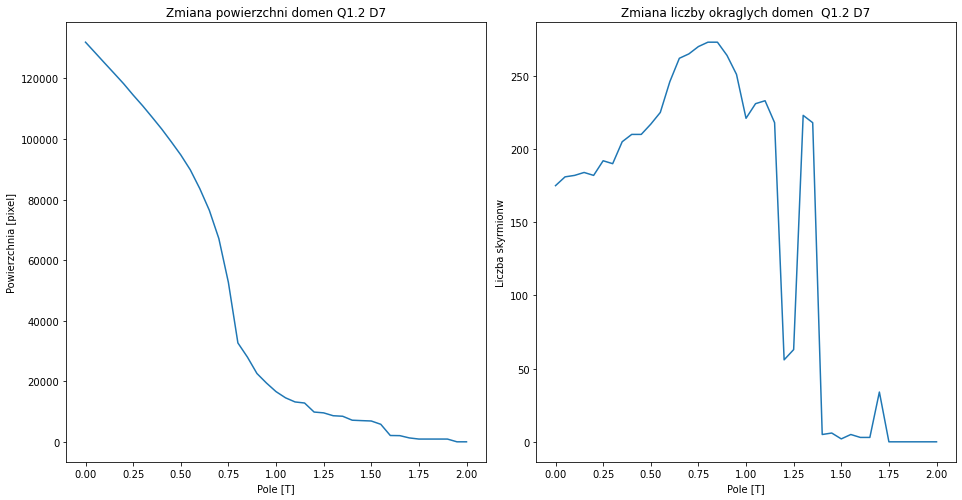

In [9]:
litx=6              
lity=7
tabT=np.zeros(41*4).reshape(4,41)
for litz in range(41):
    litxx=format(litx*0.2,".1f")            
    litzz=format(litz*0.05,".2f")
    filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
    filename=str(filename)

    logic=os.path.isfile(filename)

    if logic:

        im=np.load(filename)
        h,w = im.shape
        k=len(np.zeros(int(np.max(im)+1),dtype=int))
        if k>0:
            vtab=np.zeros(int(np.max(im)+1),dtype=int)
            xtab=np.zeros(int(np.max(im)+1),dtype=float)
            ytab=np.zeros(int(np.max(im)+1),dtype=float)
            r2tab=np.ones(int(np.max(im)+1),dtype=float)

        for y in range(h):
            for x in range(w):
                t=int(im[y,x])
                if t>=0:
                    vtab[t]+=1
                    xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                    ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                    r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                    if r2>r2tab[t]:
                        r2tab[t]=r2

        if len(vtab)>0:  
            minw=np.min(vtab)
            maxw=np.max(vtab)
            swaz=np.average(vtab)
        else:
            minw=0
            maxw=0
            swaz=0

        kolo=vtab/r2tab>2
        kolmap=np.zeros(np.shape(im))
        for x in range(h):
            for y in range(w):
                t=int(im[x,y])
                if t>=0:
                    kolmap[y,x]=kolo[t]
        
        tabT[0,litz]=litzz
        tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100
        tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1)) 
        tabT[3,litz]=np.sum(kolo)


        
plt.figure(figsize=(20,20))
plot1 = plt.subplot2grid((3,3), (0, 0)) 
plot2 = plt.subplot2grid((3,3), (0, 1)) 
plot2.plot(tabT[0,:],tabT[3,:])  
plot2.set_title(f"Zmiana liczby okraglych domen  Q{litxx} D{lity}")
plot2.set_xlabel('Pole [T]')
plot2.set_ylabel('Liczba skyrmionw') 
plot1.plot(tabT[0,:],tabT[2,:])  
plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
plot1.set_xlabel('Pole [T]')
plot1.set_ylabel('Powierzchnia [pixel]')
plt.tight_layout() 

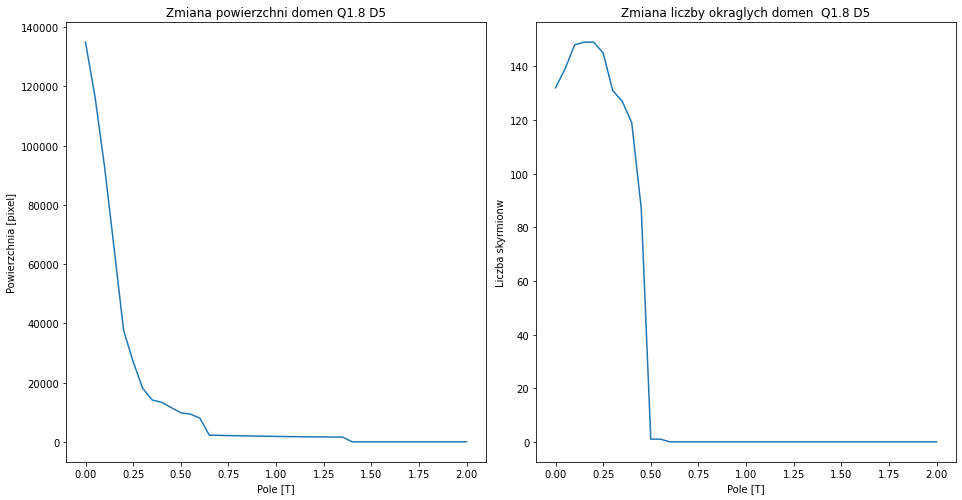

In [11]:
litx=9              
lity=5
tabT=np.zeros(41*4).reshape(4,41)
for litz in range(41):
    litxx=format(litx*0.2,".1f")            
    litzz=format(litz*0.05,".2f")
    filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
    filename=str(filename)

    logic=os.path.isfile(filename)

    if logic:

        im=np.load(filename)
        h,w = im.shape
        k=len(np.zeros(int(np.max(im)+1),dtype=int))
        if k>0:
            vtab=np.zeros(int(np.max(im)+1),dtype=int)
            xtab=np.zeros(int(np.max(im)+1),dtype=float)
            ytab=np.zeros(int(np.max(im)+1),dtype=float)
            r2tab=np.ones(int(np.max(im)+1),dtype=float)

        for y in range(h):
            for x in range(w):
                t=int(im[y,x])
                if t>=0:
                    vtab[t]+=1
                    xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                    ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                    r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                    if r2>r2tab[t]:
                        r2tab[t]=r2

        if len(vtab)>0:  
            minw=np.min(vtab)
            maxw=np.max(vtab)
            swaz=np.average(vtab)
        else:
            minw=0
            maxw=0
            swaz=0

        kolo=vtab/r2tab>2
        kolmap=np.zeros(np.shape(im))
        for x in range(h):
            for y in range(w):
                t=int(im[x,y])
                if t>=0:
                    kolmap[y,x]=kolo[t]
        
        tabT[0,litz]=litzz
        tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100
        tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1)) 
        tabT[3,litz]=np.sum(kolo)


        
plt.figure(figsize=(20,20))
plot1 = plt.subplot2grid((3,3), (0, 0)) 
plot2 = plt.subplot2grid((3,3), (0, 1)) 
plot2.plot(tabT[0,:],tabT[3,:])  
plot2.set_title(f"Zmiana liczby okraglych domen  Q{litxx} D{lity}")
plot2.set_xlabel('Pole [T]')
plot2.set_ylabel('Liczba skyrmionw') 
plot1.plot(tabT[0,:],tabT[2,:])  
plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
plot1.set_xlabel('Pole [T]')
plot1.set_ylabel('Powierzchnia [pixel]')
plt.tight_layout() 

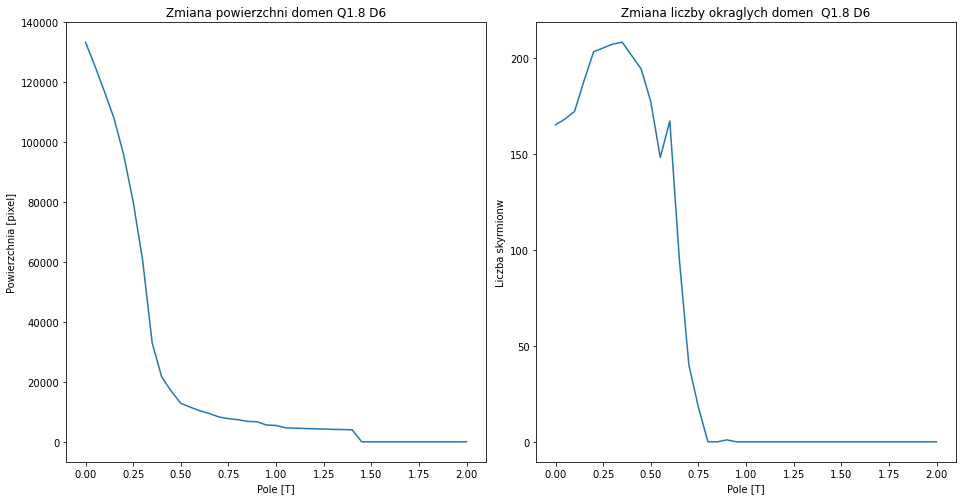

In [12]:
litx=9             
lity=6
tabT=np.zeros(41*4).reshape(4,41)
for litz in range(41):
    litxx=format(litx*0.2,".1f")            
    litzz=format(litz*0.05,".2f")
    filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
    filename=str(filename)

    logic=os.path.isfile(filename)

    if logic:

        im=np.load(filename)
        h,w = im.shape
        k=len(np.zeros(int(np.max(im)+1),dtype=int))
        if k>0:
            vtab=np.zeros(int(np.max(im)+1),dtype=int)
            xtab=np.zeros(int(np.max(im)+1),dtype=float)
            ytab=np.zeros(int(np.max(im)+1),dtype=float)
            r2tab=np.ones(int(np.max(im)+1),dtype=float)

        for y in range(h):
            for x in range(w):
                t=int(im[y,x])
                if t>=0:
                    vtab[t]+=1
                    xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                    ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                    r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                    if r2>r2tab[t]:
                        r2tab[t]=r2

        if len(vtab)>0:  
            minw=np.min(vtab)
            maxw=np.max(vtab)
            swaz=np.average(vtab)
        else:
            minw=0
            maxw=0
            swaz=0

        kolo=vtab/r2tab>2
        kolmap=np.zeros(np.shape(im))
        for x in range(h):
            for y in range(w):
                t=int(im[x,y])
                if t>=0:
                    kolmap[y,x]=kolo[t]
        
        tabT[0,litz]=litzz
        tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100
        tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1)) 
        tabT[3,litz]=np.sum(kolo)


        
plt.figure(figsize=(20,20))
plot1 = plt.subplot2grid((3,3), (0, 0)) 
plot2 = plt.subplot2grid((3,3), (0, 1)) 
plot2.plot(tabT[0,:],tabT[3,:])  
plot2.set_title(f"Zmiana liczby okraglych domen  Q{litxx} D{lity}")
plot2.set_xlabel('Pole [T]')
plot2.set_ylabel('Liczba skyrmionw') 
plot1.plot(tabT[0,:],tabT[2,:])  
plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
plot1.set_xlabel('Pole [T]')
plot1.set_ylabel('Powierzchnia [pixel]')
plt.tight_layout() 

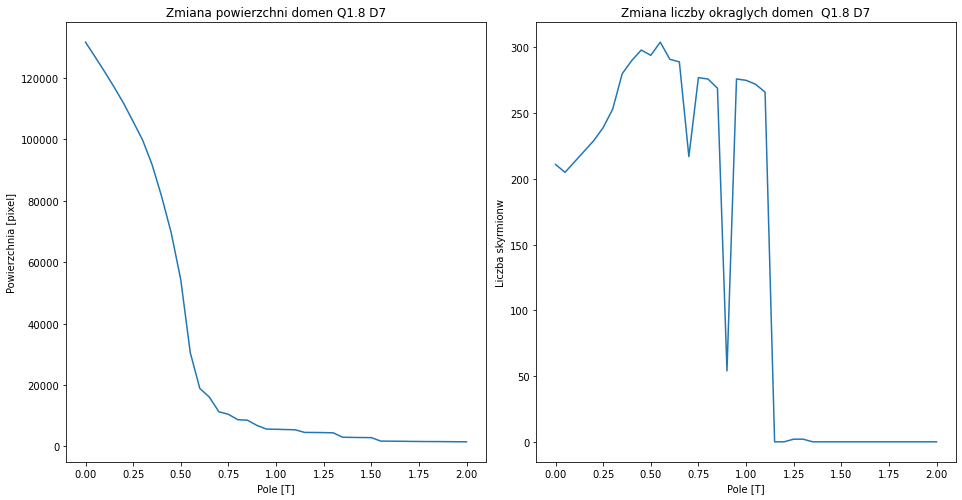

In [13]:
litx=9              
lity=7
tabT=np.zeros(41*4).reshape(4,41)
for litz in range(41):
    litxx=format(litx*0.2,".1f")            
    litzz=format(litz*0.05,".2f")
    filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
    filename=str(filename)

    logic=os.path.isfile(filename)

    if logic:

        im=np.load(filename)
        h,w = im.shape
        k=len(np.zeros(int(np.max(im)+1),dtype=int))
        if k>0:
            vtab=np.zeros(int(np.max(im)+1),dtype=int)
            xtab=np.zeros(int(np.max(im)+1),dtype=float)
            ytab=np.zeros(int(np.max(im)+1),dtype=float)
            r2tab=np.ones(int(np.max(im)+1),dtype=float)

        for y in range(h):
            for x in range(w):
                t=int(im[y,x])
                if t>=0:
                    vtab[t]+=1
                    xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                    ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                    r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                    if r2>r2tab[t]:
                        r2tab[t]=r2

        if len(vtab)>0:  
            minw=np.min(vtab)
            maxw=np.max(vtab)
            swaz=np.average(vtab)
        else:
            minw=0
            maxw=0
            swaz=0

        kolo=vtab/r2tab>2
        kolmap=np.zeros(np.shape(im))
        for x in range(h):
            for y in range(w):
                t=int(im[x,y])
                if t>=0:
                    kolmap[y,x]=kolo[t]
        
        tabT[0,litz]=litzz
        tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100
        tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1)) 
        tabT[3,litz]=np.sum(kolo)


        
plt.figure(figsize=(20,20))
plot1 = plt.subplot2grid((3,3), (0, 0)) 
plot2 = plt.subplot2grid((3,3), (0, 1)) 
plot2.plot(tabT[0,:],tabT[3,:])  
plot2.set_title(f"Zmiana liczby okraglych domen  Q{litxx} D{lity}")
plot2.set_xlabel('Pole [T]')
plot2.set_ylabel('Liczba skyrmionw') 
plot1.plot(tabT[0,:],tabT[2,:])  
plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
plot1.set_xlabel('Pole [T]')
plot1.set_ylabel('Powierzchnia [pixel]')
plt.tight_layout() 